### ICA 6
#### Md Arifuzzaman Faisal, Mikayla Norton, Abigael Mogusu, Michael Guel

### Part 2

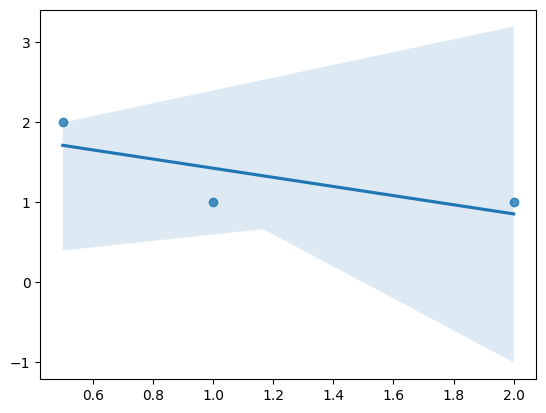

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Your dataset
#dataset = [(0.5, 2), (1, 1)]
dataset = [(0.5,2),(1,1), (2,1)]

# Convert the data to NumPy arrays
x, y = zip(*dataset)
x = np.array(x)
y = np.array(y)

# Create the regression plot
sns.regplot(x=x, y=y)

# Show the plot
plt.show()

In [148]:
def mae(y_true, y_pred):
    n = len(y_true)
    return sum(abs(y_true[i] - y_pred[i]) for i in range(n))

def mse(y_true, y_pred):
    n = len(y_true)
    return sum((y_true[i] - y_pred[i])**2 for i in range(n))

def find_slop_and_b(x,y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    cov_x_y = sum((x[i] - x_mean)*(y[i] - y_mean) for i in range(n))/(n-1)
    cov_x_x = sum((x[i] - x_mean)**2 for i in range(n))/(n-1)
    m = cov_x_y / cov_x_x
    b = y_mean-m*x_mean
    print(m,b)
    return m,b

In [149]:
def pridicted_y(x,y,test_x):
    m, b = find_slop_and_b(x,y)
    yp = m*test_x+b
    return yp

In [150]:
test_x = np.array([ 3, 4, 5])
y_pridicted = pridicted_y(x,y,test_x)
print(y_pridicted)

-0.5714285714285715 2.0
[ 0.28571429 -0.28571429 -0.85714286]


### Pridict Y data at given X points 

In [151]:
given_x = x
pridicted_y_at_yiven_x = pridicted_y(x,y,given_x)
print(pridicted_y_at_yiven_x)

-0.5714285714285715 2.0
[1.71428571 1.42857143 0.85714286]


In [152]:
# Calculate MAE and MSE
mean_abs_err = mae(y, pridicted_y_at_yiven_x)
mean_sqr_err = mse(y, pridicted_y_at_yiven_x)

# Display MAE and MSE
print(f"Mean Absolute Error (MAE): {mean_abs_err}")
print(f"Mean Squared Error (MSE): {mean_sqr_err}")

Mean Absolute Error (MAE): 0.8571428571428572
Mean Squared Error (MSE): 0.28571428571428564


<Axes: >

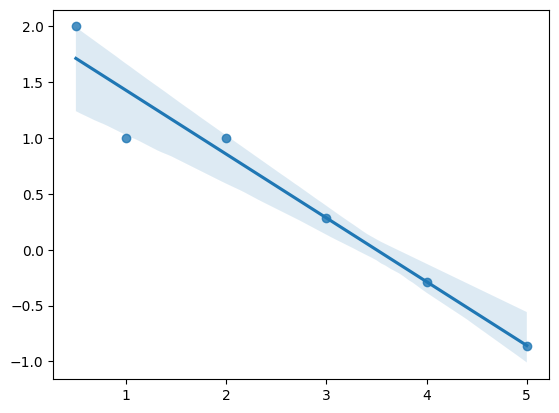

In [153]:
new_x = np.concatenate((x, test_x), axis=0)

new_y = np.concatenate((y, y_pridicted), axis=0)

# Create the regression plot
sns.regplot(x=new_x, y=new_y)